# Text mining and basic language comparison

The goal of this project is to analyse the first chapter of the Emile Zola's book, *L'assommoir* in five different languages.

In [257]:
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt

In [271]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.linewidth'] = 1.0

In [375]:
def get_sentences(filename):

    # List of symbol to be taken with care
    symbols = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
               '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    
    # Open the file
    f = open(filename, 'r', encoding='utf8')

    # Fill it all in the same string
    text = ''
    for l in f:
        text += l.strip().replace('\xa0',' ')
    
    # Get the sentences separated by ., ..., ?, !
    seps = ['.', '…', '...', '?', '¿', '!']
    sentences = [text]
    for sep in seps:
        s, sentences = sentences, []
        for seq in s:
            sentences += seq.split(sep)

    # Clean
    sentences = [s.strip() for s in sentences if s and s not in symbols]
    
    # Return
    return sentences


def get_words_from_sentences(sentences):
    to_be_space = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', 
                   '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    all_words = ' '.join(sentences)
    for symbol in to_be_space:
        all_words = all_words.replace(symbol, ' ')
    all_words = all_words.split(' ')
    all_words = [w.casefold() for w in all_words if w]
    return all_words


def get_letters_from_sentences(sentences):
    to_disgard = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
                  '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    all_letters = ''.join(sentences)
    all_letters = [l.casefold() for l in all_letters if l and l not in to_disgard]
    return all_letters  

In [368]:
def count_words_per_sentences(sentences):
    words = [s.split(' ') for s in sentences]
    return [len(w) for w in words]


def count_letters_per_words(words):
    return [len(w) for w in words]


def count_letters_frequency(letters):
    Ntot = len(letters)
    counters = dict(Counter(letters))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:float(v/Ntot) for k, v in ordered_counts.items()}


def count_words_frequency(words):
    Ntot = len(words)
    counters = dict(Counter(words))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:v/Ntot for k, v in ordered_counts.items()}


def count_cumulative_words(words):
    Ntot = len(words)
    return [len(Counter(words[:i])) for i in range(0, len(words))]

In [369]:
def get_text_data(fname):
    data = {}
    data['sentences'] = get_sentences(fname)
    data['words'] = get_words_from_sentences(data['sentences'])
    data['letters'] = get_letters_from_sentences(data['sentences'])
    data['cumul_words'] = count_cumulative_words(data['words'])
    return data  

In [370]:
data_fr = get_text_data('../data/LAssommoir_fr.txt')
data_en = get_text_data('../data/LAssommoir_en.txt')
data_de = get_text_data('../data/LAssommoir_de.txt')
data_it = get_text_data('../data/LAssommoir_it.txt')
data_es = get_text_data('../data/LAssommoir_es.txt')

In [383]:
def plot_text_data(*args):
        
    # Prepare the canvas to plot the results
    plt.figure(figsize=(23, 15))
    grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    ax2 = plt.subplot(grid[0, 1])
    ax3 = plt.subplot(grid[1, :3])
    ax4 = plt.subplot(grid[0, 2])
    
    # plot style
    hist_style = {'density': True, 'histtype': 'step', 'alpha': 0.3, 'linewidth': 5}
    plot_style = {'alpha': 0.3, 'linewidth': 5}
    
    for data in args:
    
        # Unpack text data
        name, text_data = data
        sentences = text_data['sentences']
        words = text_data['words']
        letters = text_data['letters']
        cumul_words = text_data['cumul_words']
        
        # Compute few basic stat
        Nwords = count_words_per_sentences(sentences)
        Nletters = count_letters_per_words(words)
        freq_letters = count_letters_frequency(letters)
    
        # plot sentence length
        ax1.hist(Nwords, bins=range(1, 80, 4), label=name + ' ({})'.format(len(sentences)), **hist_style)
        ax1.set_xlabel('Number of words per sentence')
        ax1.legend()
    
        # plot word length
        ax2.hist(Nletters, bins=range(1, 26), label=name + ' ({})'.format(len(words)), **hist_style)
        ax2.set_xlabel('Number of letters per word')
        ax2.legend()
    
        # plot letter apparition frequency
        x, y = list(freq_letters.keys()), list(freq_letters.values())    
        ax3.bar(x, y, alpha=0.3, label=name)
        ax3.legend()
        
        # plot cumulative number of words
        ax4.plot(cumul_words, label=name, **plot_style)
        ax4.set_xlabel('Number of words')
        ax4.set_ylabel('Number of unique words')
        ax4.legend()

    return

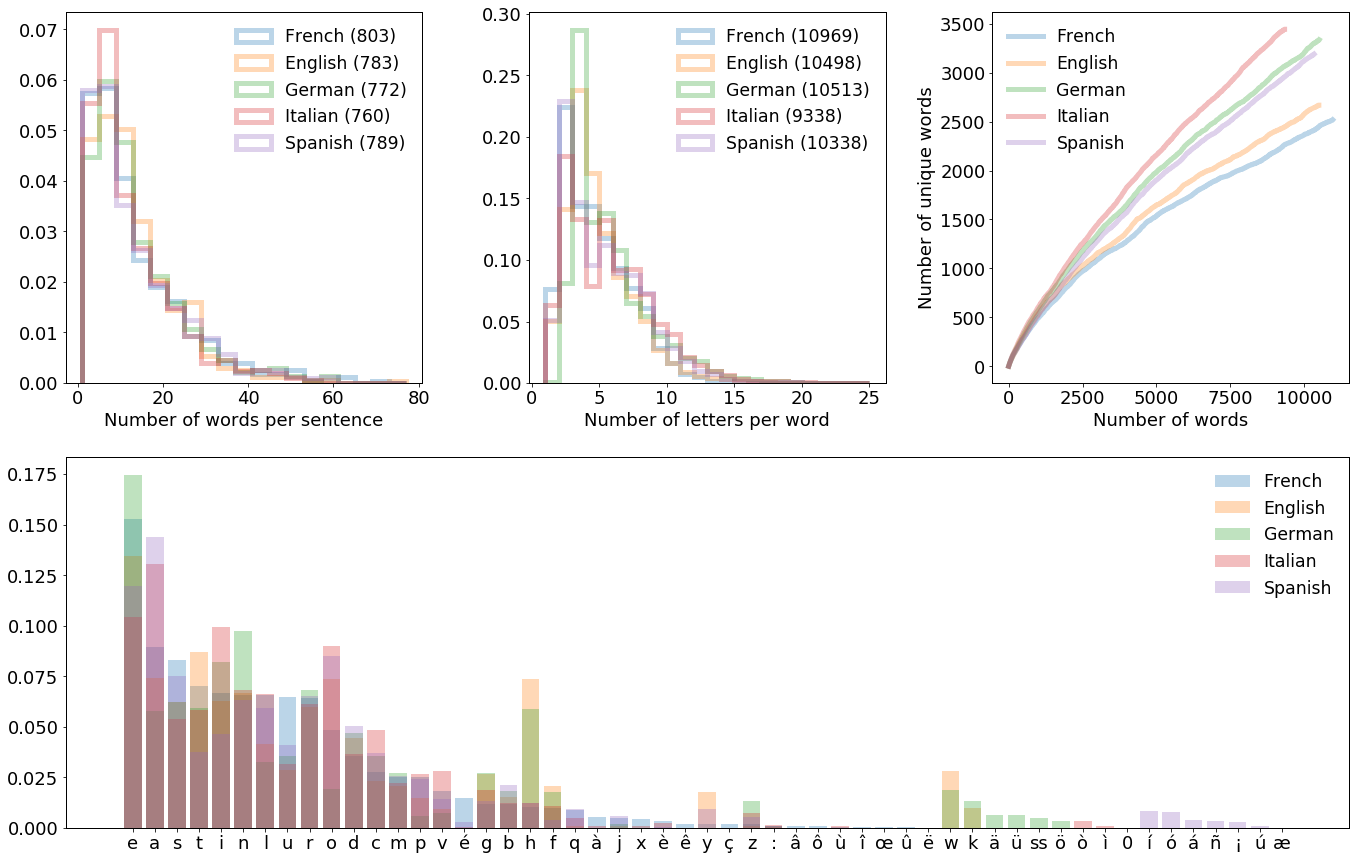

In [384]:
plot_text_data(['French', data_fr], 
               ['English', data_en], 
               ['German', data_de], 
               ['Italian', data_it],
               ['Spanish', data_es])

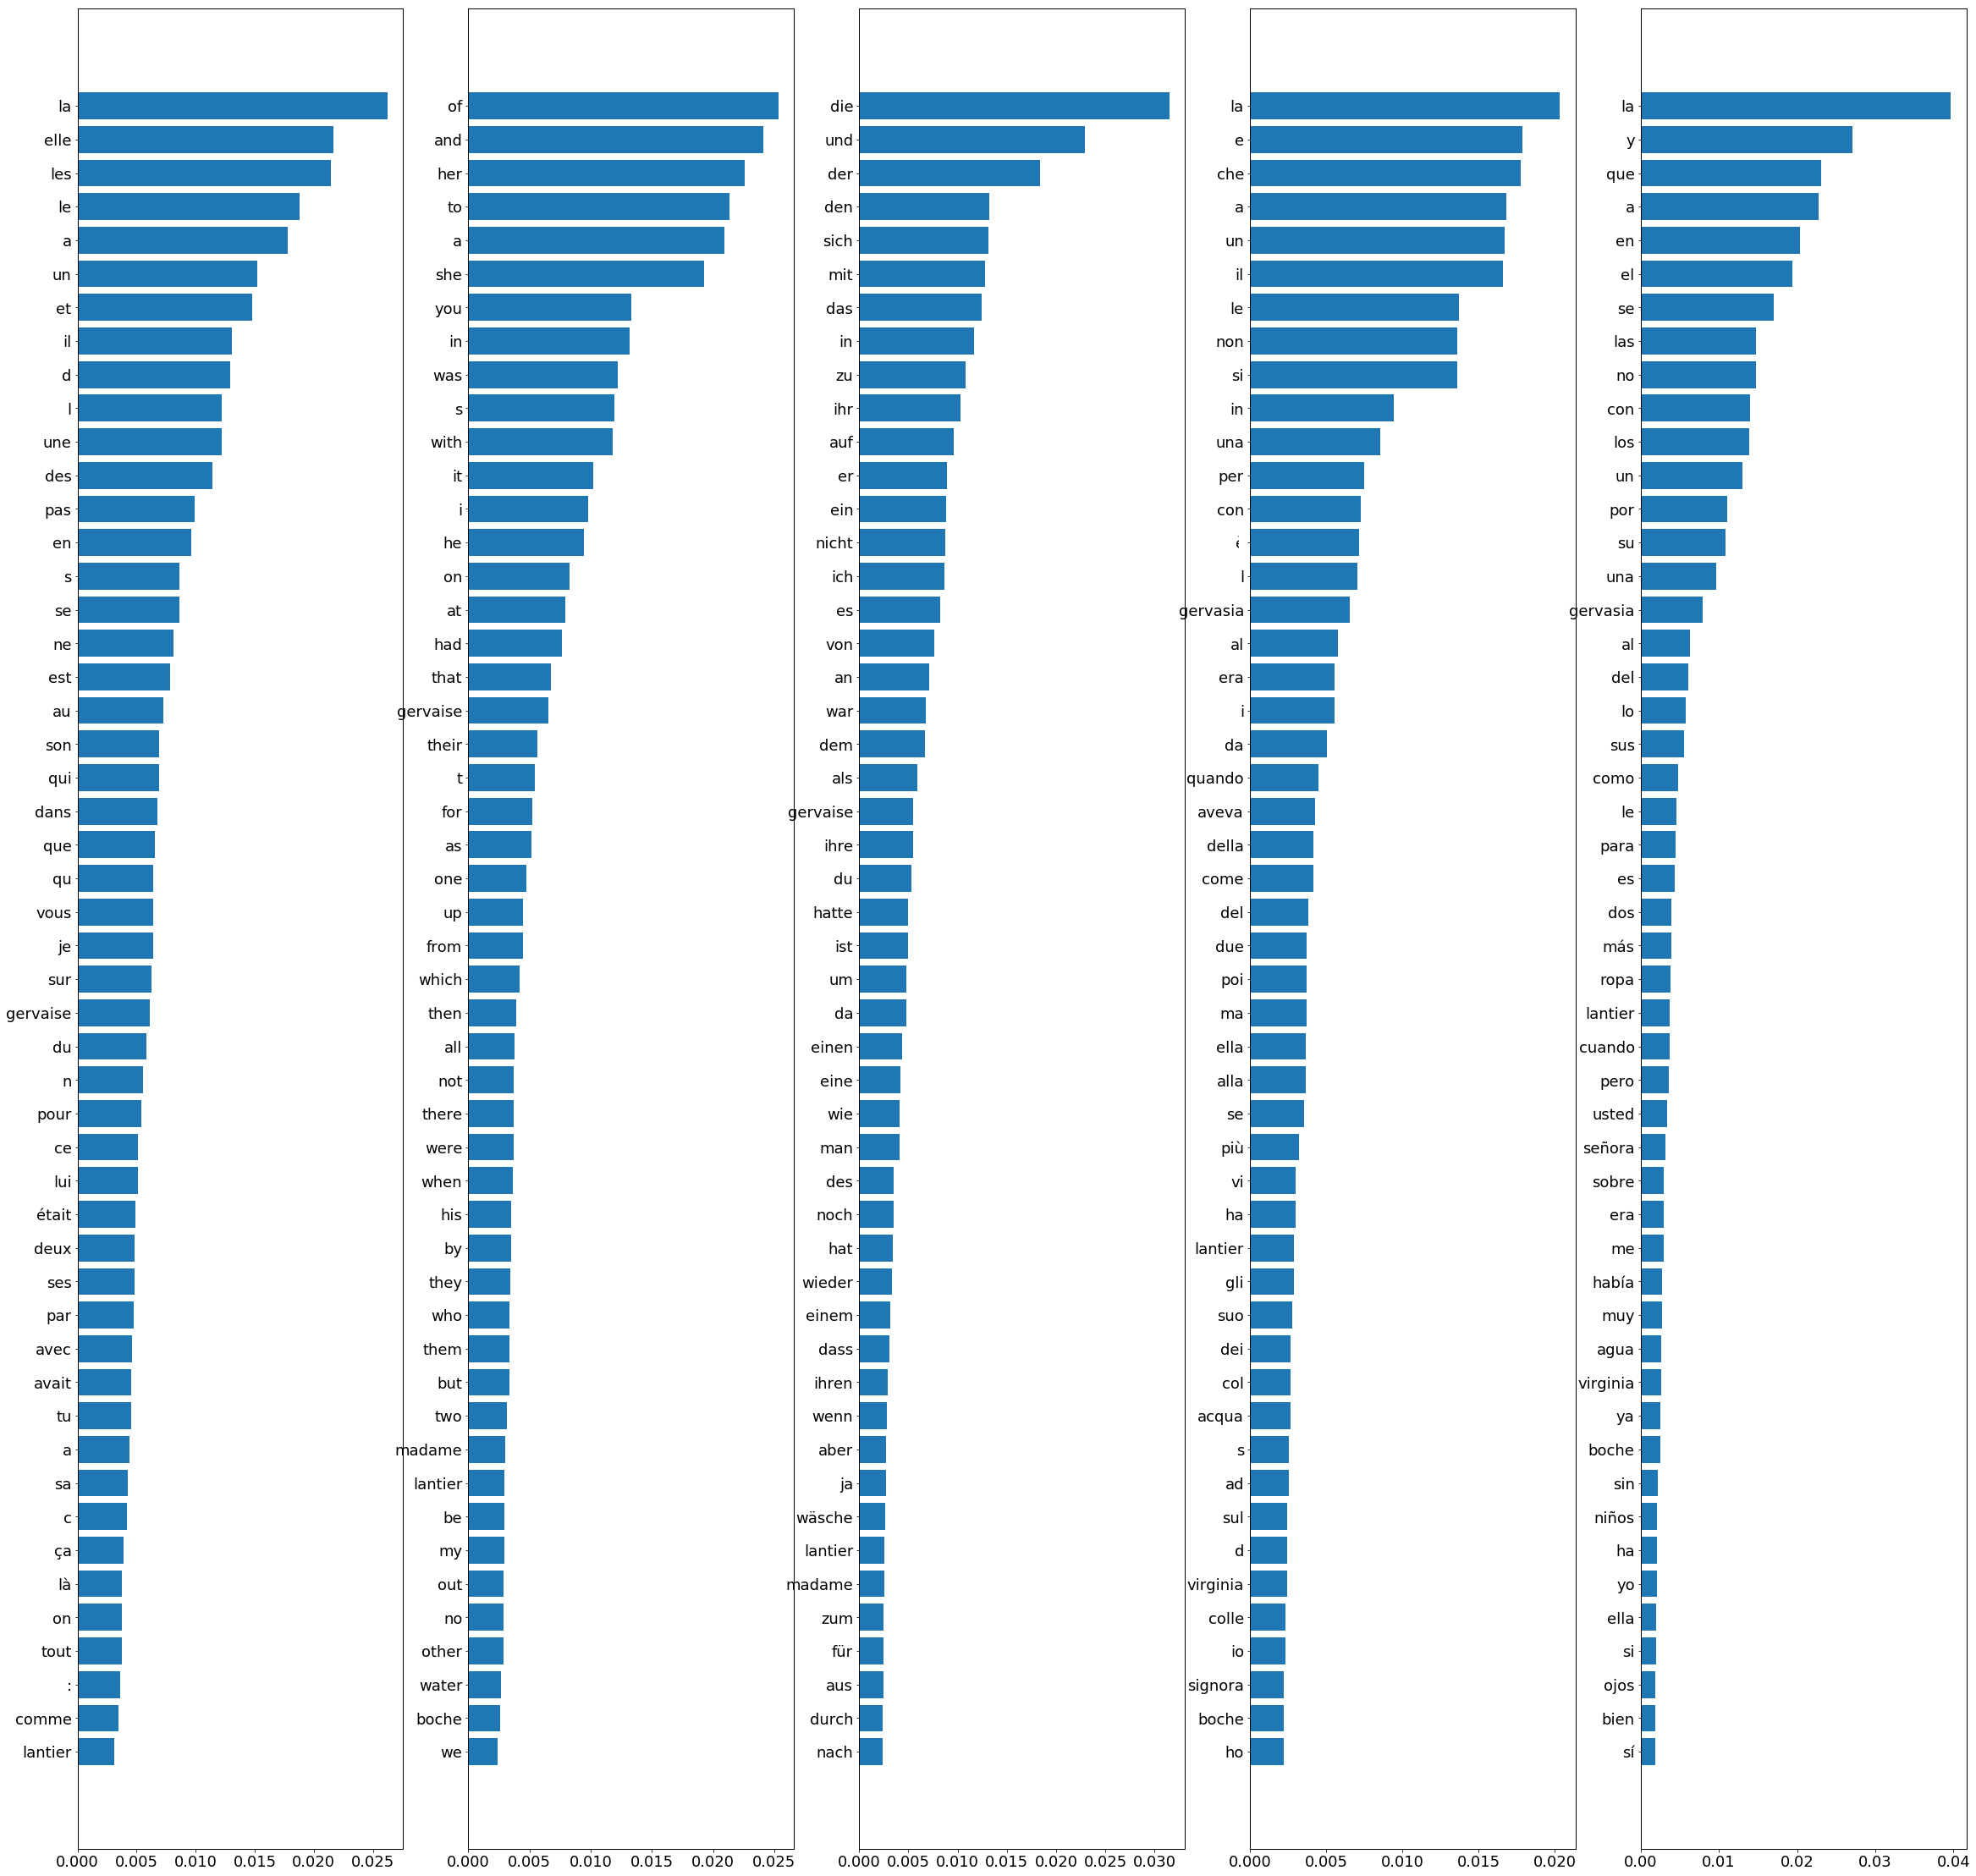

In [420]:
# Data to be plotted
all_data = [['French', data_fr], ['English', data_en], 
            ['German', data_de], ['Italian', data_it], 
            ['Spanish', data_es]]

# Figure and subplots
fig, axs = plt.subplots(figsize=(40, 40), nrows=1, ncols=len(all_data))

# Loop over axis and data
for ax, block in zip(axs, all_data):
    name, data = block
    frequency = count_words_frequency(data['words'])
    x, y = list(frequency.keys()), list(frequency.values())
    ax.barh(x[50:0:-1], y[50:0:-1]);